In [1]:
# Importing the libraries
from RBM import RBM
import torch 
import torchvision
from torchvision import datasets,transforms
from torch.utils.data import Dataset,DataLoader

import matplotlib
import matplotlib.pyplot as plt

import math
import numpy as np

In [2]:
#Loading MNIST dataset
mnist_data = datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose(
                    [transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]))

In [3]:
mnist_data.train_data = (mnist_data.train_data.type(torch.FloatTensor)/255).bernoulli()

The number shown is the number: 2


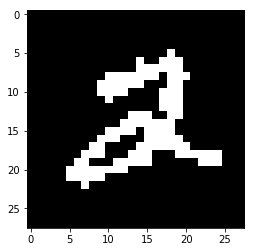

In [4]:
#Lets us visualize a number from the data set
idx = 5
img = mnist_data.train_data[idx]
print("The number shown is the number: {}".format(mnist_data.train_labels[idx]) )
plt.imshow(img , cmap = 'gray')
plt.show()

In [6]:
# If we train on the whole set we expect it to learn to detect edges.
batch_size= 10
tensor_x = mnist_data.train_data.type(torch.FloatTensor) # transform to torch tensors
tensor_y = mnist_data.train_labels.type(torch.FloatTensor)
_dataset = torch.utils.data.TensorDataset(tensor_x,tensor_y) # create your datset
train_loader = torch.utils.data.DataLoader(_dataset,
                    batch_size=batch_size, shuffle=True,drop_last = True)

In [7]:
# I have have set these hyper parameters although you can experiment with them to find better hyperparameters.
visible_units=28*28
hidden_units = 500
k=3
learning_rate=0.01
learning_rate_decay = True
xavier_init = True
increase_to_cd_k = False
use_gpu = False


rbm_mnist = RBM(visible_units,hidden_units,k ,learning_rate,learning_rate_decay,xavier_init,
                increase_to_cd_k,use_gpu)

In [8]:
epochs = 30

rbm_mnist.train(train_loader , epochs,batch_size)

RBM fitting: 6000it [00:35, 168.78it/s]
Epoch:1 ,avg_cost = 0.7085932493209839 ,std_cost = 0.14456462860107422 ,avg_grad = 14936.6689453125 ,std_grad = 3487.916259765625
RBM fitting: 6000it [00:34, 174.73it/s]
Epoch:2 ,avg_cost = 0.5163965821266174 ,std_cost = 0.05703886225819588 ,avg_grad = 12198.873046875 ,std_grad = 623.3045654296875
RBM fitting: 6000it [00:37, 160.94it/s]
Epoch:3 ,avg_cost = 0.4490070044994354 ,std_cost = 0.04749409854412079 ,avg_grad = 11314.248046875 ,std_grad = 521.8931884765625
RBM fitting: 6000it [00:36, 163.55it/s]
Epoch:4 ,avg_cost = 0.4090489149093628 ,std_cost = 0.043332550674676895 ,avg_grad = 10750.8310546875 ,std_grad = 489.9877624511719
RBM fitting: 6000it [00:36, 166.53it/s]
Epoch:5 ,avg_cost = 0.3816293179988861 ,std_cost = 0.040385130792856216 ,avg_grad = 10359.734375 ,std_grad = 466.4506530761719
RBM fitting: 1057it [00:06, 152.37it/s]

KeyboardInterrupt: 

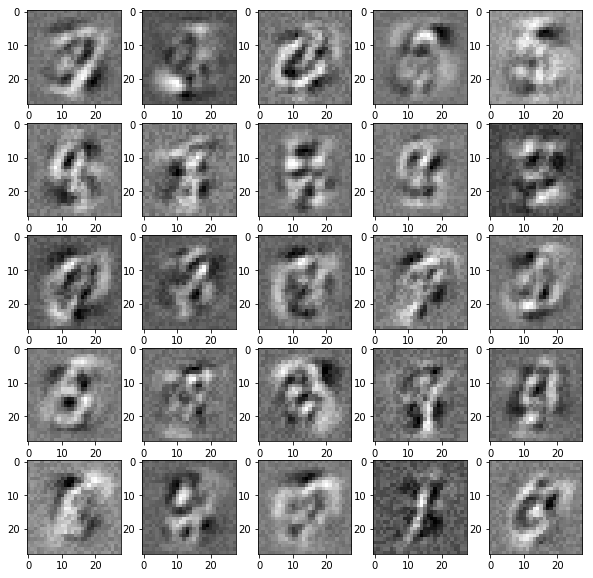

RBM fitting: 1057it [00:20, 52.84it/s] 

In [9]:
learned_weights = rbm_mnist.W.transpose(0,1).numpy()
plt.show()
fig = plt.figure(3, figsize=(10,10))
for i in range(25): 
    sub = fig.add_subplot(5, 5, i+1)
    sub.imshow(learned_weights[i,:].reshape((28,28)), cmap=plt.cm.gray)
plt.show()

In [ ]:
#This is an unsupervised learning algorithm. So let us try training on one particular number.But first
# we need to seperate the data.

number = 5 #A number between 0 and 10.

particular_mnist = []

limit = mnist_data.train_data.shape[0]
# limit = 60000
for i in range(limit):
    if(mnist_data.train_labels[i] == number):
        particular_mnist.append(mnist_data.train_data[i].numpy())
# particular_mnist = np.array(particular_mnist)
len(particular_mnist)
# mnist_data.train_data

In [ ]:
tensor_x = torch.stack([torch.Tensor(i) for i in particular_mnist]).type(torch.FloatTensor)
tensor_y = torch.stack([torch.Tensor(number) for i in range(len(particular_mnist))]).type(torch.FloatTensor)


In [11]:
mnist_particular_dataset = torch.utils.data.TensorDataset(tensor_x,tensor_y)
mnist_particular_dataloader = torch.utils.data.DataLoader(mnist_particular_dataset)

In [12]:
epochs = 50
batch_size = 64
rbm_mnist.train(mnist_particular_dataloader , epochs)

RBM fitting: 5421it [00:31, 170.93it/s]
Epoch:1 ,avg_cost = 0.07643472403287888 ,std_cost = 0.02217467501759529 ,avg_grad = 2229.36767578125 ,std_grad = 477.46636962890625
RBM fitting: 5421it [00:31, 171.38it/s]
Epoch:2 ,avg_cost = 0.06476756185293198 ,std_cost = 0.01552626397460699 ,avg_grad = 1810.8741455078125 ,std_grad = 154.0926513671875
RBM fitting: 5421it [00:32, 168.50it/s]
Epoch:3 ,avg_cost = 0.06242591142654419 ,std_cost = 0.015021909028291702 ,avg_grad = 1741.4207763671875 ,std_grad = 144.86724853515625
RBM fitting: 5421it [00:37, 144.40it/s]
Epoch:4 ,avg_cost = 0.06053551286458969 ,std_cost = 0.014589309692382812 ,avg_grad = 1698.8974609375 ,std_grad = 142.43772888183594
RBM fitting: 5421it [00:33, 159.81it/s]
Epoch:5 ,avg_cost = 0.05958360433578491 ,std_cost = 0.014422673732042313 ,avg_grad = 1671.249755859375 ,std_grad = 140.17909240722656
RBM fitting: 5421it [00:33, 160.31it/s]
Epoch:6 ,avg_cost = 0.05858011916279793 ,std_cost = 0.014186893589794636 ,avg_grad = 1648.3013

RBM fitting: 5421it [00:31, 173.64it/s]
Epoch:48 ,avg_cost = 0.0536918081343174 ,std_cost = 0.012849408201873302 ,avg_grad = 1507.6199951171875 ,std_grad = 125.67536163330078
RBM fitting: 5421it [00:31, 174.22it/s]
Epoch:49 ,avg_cost = 0.0536741279065609 ,std_cost = 0.012915256433188915 ,avg_grad = 1507.1263427734375 ,std_grad = 125.58218383789062
RBM fitting: 5421it [00:37, 144.46it/s]
Epoch:50 ,avg_cost = 0.053582895547151566 ,std_cost = 0.012936854735016823 ,avg_grad = 1505.4290771484375 ,std_grad = 125.93535614013672


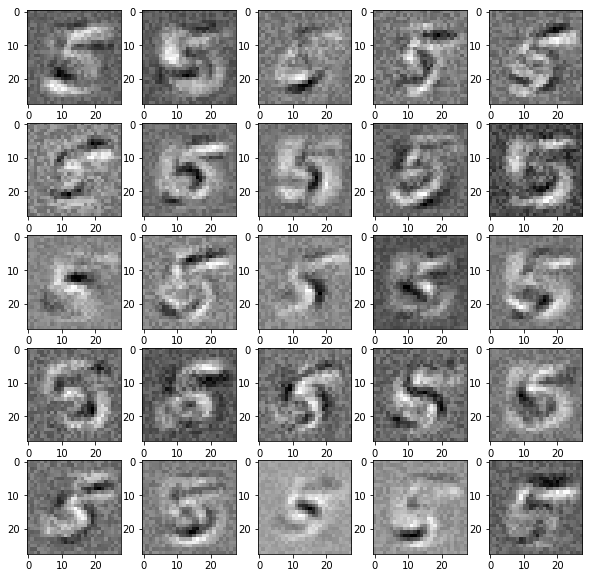

In [13]:
# This shows the weights for each of the 64 hidden neurons and give an idea how each neuron is activated.

learned_weights = rbm_mnist.W.transpose(0,1).numpy()
plt.show()
fig = plt.figure(3, figsize=(10,10))
for i in range(25): 
    sub = fig.add_subplot(5, 5, i+1)
    sub.imshow(learned_weights[i, :].reshape((28,28)), cmap=plt.cm.gray)
plt.show()

The original number: 5


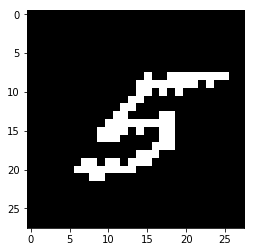

The reconstructed image


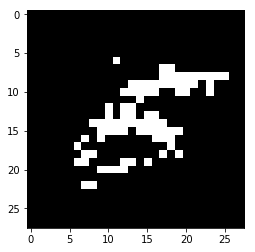

In [21]:
#Lets try reconstructing a random number from this model which has learned 5
idx = 985
img = mnist_data.train_data[idx]
reconstructed_img = img.view(-1).type(torch.FloatTensor)

_ , reconstructed_img = rbm_mnist.to_hidden(reconstructed_img)
_ , reconstructed_img = rbm_mnist.to_visible(reconstructed_img)



reconstructed_img = reconstructed_img.view((28,28))
print("The original number: {}".format(mnist_data.train_labels[idx]))
plt.imshow(img , cmap = 'gray')
plt.show()
print("The reconstructed image")
plt.imshow(reconstructed_img , cmap = 'gray')
plt.show()